# Simple linear regression models from scratch
### The goal of this notebook is to implement Linear Regression from scratch
##### %matplotlib inline: display plots inline in Jupyter notebook

In [197]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1- Hypothesis:
## $$h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\theta_{3} x_{3}+\theta_{4} x_{4}+\ldots \ldots+\theta_{n} x_{n}$$
## $$h_{\theta}(x)=\theta^{T} X$$

In [198]:
# theta = Features(x) + 1
# Feattures = 55
# theta = 56
# Features = 56
# shape theta => (56, 1)
# shape x(Features) => (23786, 56)
# h = x * theta
# shape h => (23786, 1)
def hypothesis(theta, x):
    h = np.dot(x, theta)
    return h

# 2- Cost Function:
## $$J\left(\theta_{0}, \theta_{1}, \ldots, \theta_{n}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$

In [199]:
def cost_function(m, y, h):
    J = (1/(2*m))*(np.sum(np.power((h-y),2)))
    return J

# 3- Gradient Descent:
## $$\theta_{j}:=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J\left(\theta_{0}, \ldots, \theta_{n}\right)$$
## $$\theta_{j}:=\theta_{j}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_j^{(i)}$$

In [200]:
# shape x(Features) => (23786, 56)
#shape h-y => (23786, 1)
def Gradient_descent(alpha, m, h, y, theta, x):
    temp_1 = theta - (alpha/m) * np.dot(x.T,(h-y))
    return temp_1

# Read Data: 

In [201]:
train = pd.read_csv(R"D:\ML_Support\data_regression\train.csv", sep=';')
test = pd.read_csv(R"D:\ML_Support\data_regression\test.csv",  sep=';')
sample_submission = pd.read_csv(R"D:\ML_Support\data_regression\sample_submission.csv", sep=';')
train.insert(0, 'x0', 1)
alpha = 1e-14
number_iter=1000
lst = []
theta = np.zeros((Features.shape[1], 1))

In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23786 entries, 0 to 23785
Data columns (total 58 columns):
x0                              23786 non-null int64
tag                             23786 non-null object
tag_label                       23786 non-null int64
data_channel                    23786 non-null int64
timedelta                       23786 non-null int64
n_tokens_title                  23786 non-null int64
n_tokens_content                23786 non-null int64
n_unique_tokens                 23786 non-null float64
n_non_stop_words                23786 non-null float64
n_non_stop_unique_tokens        23786 non-null float64
num_hrefs                       23786 non-null int64
num_self_hrefs                  23786 non-null int64
num_imgs                        23786 non-null int64
num_videos                      23786 non-null int64
average_token_length            23786 non-null float64
num_keywords                    23786 non-null int64
kw_min_min                      23

### Statistics of Data

In [232]:
train.describe()

,x0,tag_label,data_channel,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_sentiment_polarity,abs_title_subjectivity,shares
count,23786.0,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,...,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000,23786.000000
mean,1.0,4341.801228,2.475195,354.083452,10.395695,549.154965,0.529343,0.968595,0.671521,10.849786,...,0.094918,0.755732,-0.260015,-0.522938,-0.107736,0.283007,0.070401,0.156506,0.341339,3514.103254
std,0.0,2560.540028,1.869012,214.621137,2.114026,476.367762,0.138775,0.174413,0.156337,11.249232,...,0.071027,0.249643,0.128428,0.290564,0.096336,0.324342,0.266636,0.227060,0.189126,13618.369822
min,1.0,0.000000,0.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,1.0,2290.250000,1.000000,163.000000,9.000000,247.000000,0.470306,1.000000,0.625000,4.000000,...,0.050000,0.600000,-0.329438,-0.700000,-0.125000,0.000000,0.000000,0.000000,0.166667,951.000000
50%,1.0,4193.000000,2.000000,339.000000,10.000000,410.000000,0.538160,1.000000,0.690476,8.000000,...,0.100000,0.800000,-0.254356,-0.500000,-0.100000,0.150000,0.000000,0.000000,0.500000,1400.000000
75%,1.0,6630.000000,4.000000,542.000000,12.000000,720.000000,0.608059,1.000000,0.754967,14.000000,...,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.142857,0.250000,0.500000,2800.000000
max,1.0,8692.000000,5.000000,731.000000,20.000000,8474.000000,1.000000,1.000000,1.000000,187.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,843300.000000


# Show Shape of data (Train, Test, Sample_submission):

In [202]:
print(f"shape train => {train.shape}")
print(f"shape test => {test.shape}")
print(f"shape sample_submission => {sample_submission.shape}")

shape train => (23786, 58)
shape test => (15858, 57)
shape sample_submission => (15858, 2)


In [203]:
# Features = np.array(train.drop(['tag', 'abs_title_sentiment_polarity'], axis=1))
Features = train.drop(['tag', 'abs_title_sentiment_polarity'], axis=1)
Target = np.array(train[['abs_title_sentiment_polarity']]).reshape(-1,1)

In [204]:
print(f"shape Features => {Features.shape}")
print(f"shape Target => {Target.shape}")
print(f"shape Theta => {theta.shape}")
# m x n => Row x Column
# Row => Number of example
# Column => Number of Features

shape Features => (23786, 56)
shape Target => (23786, 1)
shape Theta => (56, 1)


In [210]:
for k in range(iteration):
    h = np.array(hypothesis(theta, Features))
    j = cost_function(row_x, Target, h)
    lst.append(j)
    theta = Gradient_descent(alpha, Features.shape[0], h, Target, theta, Features)
    if(k%50==0):
        print(j)

0.026707191814972293
0.026707137376898227
0.02670708335775743
0.026707029752791323
0.026706976557296917
0.02670692376662584
0.026706871376183515
0.026706819381428448
0.02670676777787156
0.026706716561075577
0.02670666572665439
0.026706615270272484
0.026706565187644346
0.026706515474533878
0.026706466126753817
0.0267064171401652
0.026706368510676752
0.026706320234244414
0.026706272306870713
0.026706224724604277
0.026706177483539286
0.026706130579814944
0.026706084009614953
0.02670603776916702
0.026705991854742324
0.026705946262655017
0.02670590098926175
0.026705856030961143
0.026705811384193347
0.026705767045439515
0.02670572301122136
0.026705679278100684
0.026705635842678897
0.026705592701596576
0.026705549851533
0.026705507289205715
0.026705465011370083
0.02670542301481885
0.0267053812963817
0.026705339852924847


In [226]:
index = 0
for i in theta:
    print(f"Theta_{index} => {theta[index][0]}")
    index+=1

Theta_0 => 6.92395468163492e-13
Theta_1 => 3.043155455493335e-09
Theta_2 => -1.8724039346604945e-13
Theta_3 => 4.666343447618484e-10
Theta_4 => 7.469707659450831e-12
Theta_5 => 4.1204861593245793e-10
Theta_6 => 3.482034937703626e-13
Theta_7 => 6.276277484067934e-13
Theta_8 => 4.1365406994492943e-13
Theta_9 => 1.2665562806192146e-11
Theta_10 => 2.173182881437219e-12
Theta_11 => 7.763378140820282e-12
Theta_12 => 2.6497968004727495e-12
Theta_13 => 2.8461263779619545e-12
Theta_14 => 5.646074685904271e-12
Theta_15 => 1.1971304203483886e-10
Theta_16 => 1.3430335628426244e-09
Theta_17 => 3.9958037725111e-10
Theta_18 => 4.918080579735103e-09
Theta_19 => 1.6751312539072616e-07
Theta_20 => 7.012515561879332e-08
Theta_21 => 9.29422354386828e-10
Theta_22 => 5.8036057110871735e-09
Theta_23 => 2.7991704842846306e-09
Theta_24 => 2.620532759863302e-09
Theta_25 => 4.762583331633232e-09
Theta_26 => 2.9447458758593543e-09
Theta_27 => 1.0676822652464717e-13
Theta_28 => 1.043869341048119e-13
Theta_29 => 9.

# Plot cost vs iteration

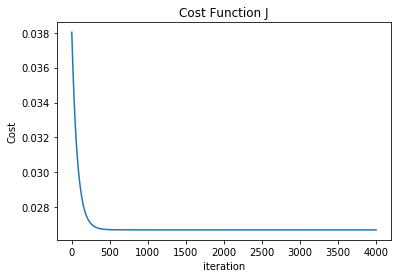

In [233]:
plt.title('Cost Function J')
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.plot(lst)
plt.show()

In [207]:
test.insert(0, 'X0', 1)
Features_test = test.drop(['Id', 'tag'], axis=1)

# The Prediction:

In [208]:
Predict = np.dot(Features_test, theta)

In [209]:
sample_submission['abs_title_sentiment_polarity'] = Predict
sample_submission.to_csv(R"D:\Machine Learning\Algorithms\Linear_Regression\sample_submission1.csv", index=False)